<a href="https://colab.research.google.com/github/KatieMears628/death-classification/blob/main/final_project_eda_km.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katie Mears - Final Project
Reclassifying Undetermined Deaths
EDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Read in the 2015_data
death_data = pd.read_csv('/2015_data.csv')
# Display the first few rows of the data
print(death_data.head())

<ipython-input-3-ea60854454ac>:1: DtypeWarning: Columns (41,42,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  death_data = pd.read_csv('/2015_data.csv')


   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

In [ ]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [ ]:
# Data Description of Original data set (2015_data.csv)
data_description_all = death_data.describe(include='all')
print(data_description_all)

        resident_status  education_1989_revision  education_2003_revision  \
count     364568.000000             50870.000000            313698.000000   
unique              NaN                      NaN                      NaN   
top                 NaN                      NaN                      NaN   
freq                NaN                      NaN                      NaN   
mean           1.149481                12.522607                 3.760085   
std            0.423208                 8.844328                 1.921759   
min            1.000000                 0.000000                 1.000000   
25%            1.000000                11.000000                 3.000000   
50%            1.000000                12.000000                 3.000000   
75%            1.000000                14.000000                 5.000000   
max            4.000000                99.000000                 9.000000   

        education_reporting_flag  month_of_death     sex  detail_age_type  

In [ ]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                    0
education_1989_revision       313698
education_2003_revision        50870
education_reporting_flag           0
month_of_death                     0
                               ...  
race_imputation_flag          361591
race_recode_3                      1
race_recode_5                      1
hispanic_origin                    1
hispanic_originrace_recode         1
Length: 77, dtype: int64


In [ ]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

In [ ]:
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 54.58%


In [ ]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '39_cause_recode', 'race','detail_age']
new_death = death_data[desired_columns]
print(new_death.head())

   education_2003_revision  month_of_death sex  \
0                      3.0               1   M   
1                      6.0               1   M   
2                      3.0               1   F   
3                      3.0               1   F   
4                      5.0               1   F   

   place_of_death_and_decedents_status marital_status  day_of_week_of_death  \
0                                    1              M                     1   
1                                    1              M                     2   
2                                    4              W                     6   
3                                    4              S                     5   
4                                    6              W                     5   

  injury_at_work  manner_of_death method_of_disposition autopsy  \
0              U              7.0                     B       N   
1              U              7.0                     C       N   
2              U       

In [ ]:
total_missing_values2 = new_death.isnull().sum().sum()
total_elements2 = new_death.size
total_percent_missing2 = (total_missing_values2 / total_elements2) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing2))

Total percentage of missing data in the sample dataset: 4.22%


In [ ]:
# Drop rows with missing values
death_dropped = new_death.dropna()

print("DataFrame after dropping rows with missing values:")
print(death_dropped)

DataFrame after dropping rows with missing values:
        education_2003_revision  month_of_death sex  \
0                           3.0               1   M   
1                           6.0               1   M   
2                           3.0               1   F   
3                           3.0               1   F   
4                           5.0               1   F   
...                         ...             ...  ..   
364540                      9.0              10   F   
364555                      4.0              11   F   
364559                      9.0               9   M   
364560                      3.0              11   M   
364566                      4.0              11   M   

        place_of_death_and_decedents_status marital_status  \
0                                         1              M   
1                                         1              M   
2                                         4              W   
3                                       

In [ ]:
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


In [ ]:
summary_stats = death_dropped.describe()
print(summary_stats)

       education_2003_revision  month_of_death  \
count            121035.000000   121035.000000   
mean                  3.718759        6.207783   
std                   1.887754        3.407741   
min                   1.000000        1.000000   
25%                   3.000000        3.000000   
50%                   3.000000        6.000000   
75%                   5.000000        9.000000   
max                   9.000000       12.000000   

       place_of_death_and_decedents_status  day_of_week_of_death  \
count                        121035.000000         121035.000000   
mean                              3.863907              4.002735   
std                               2.022336              2.007731   
min                               1.000000              1.000000   
25%                               2.000000              2.000000   
50%                               4.000000              4.000000   
75%                               5.000000              6.000000   
max  

In [ ]:
import random
import numpy as np

In [ ]:
death_dropped = np.arange(1, 1000000)

# Set the desired sample size as an integer
sample_size = 100000

# Perform random sampling using numpy
sampled_data_death = np.random.choice(death_dropped, size=sample_size, replace=False)

print("Random Sample:", sampled_data_death)

Random Sample: [460586 186272 601075 ... 799512 130063 868598]


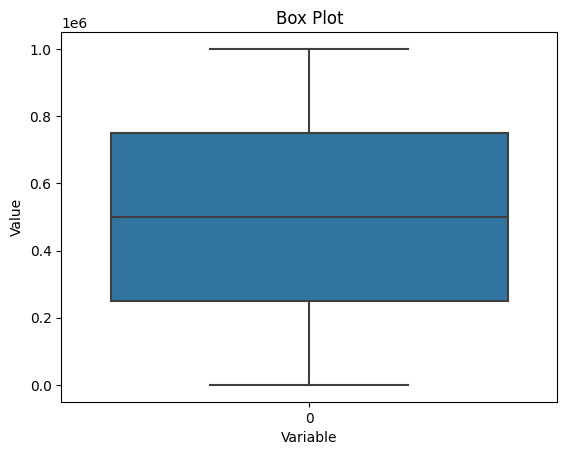

In [ ]:
sns.boxplot(sampled_data_death)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

In [ ]:
# List of desired column names
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode',
                   '113_cause_recode', '39_cause_recode', 'race', 'detail_age']

# Create a dictionary with column names as keys and the sampled data as values
data_dict = {col_name: sampled_data_death for col_name in desired_columns}

# Convert the dictionary to a pandas DataFrame
sampled_df = pd.DataFrame(data_dict)
print(sampled_df)

       education_2003_revision  month_of_death     sex  \
0                       460586          460586  460586   
1                       186272          186272  186272   
2                       601075          601075  601075   
3                       231728          231728  231728   
4                       209005          209005  209005   
...                        ...             ...     ...   
99995                    44014           44014   44014   
99996                    99683           99683   99683   
99997                   799512          799512  799512   
99998                   130063          130063  130063   
99999                   868598          868598  868598   

       place_of_death_and_decedents_status  marital_status  \
0                                   460586          460586   
1                                   186272          186272   
2                                   601075          601075   
3                                   231728          231

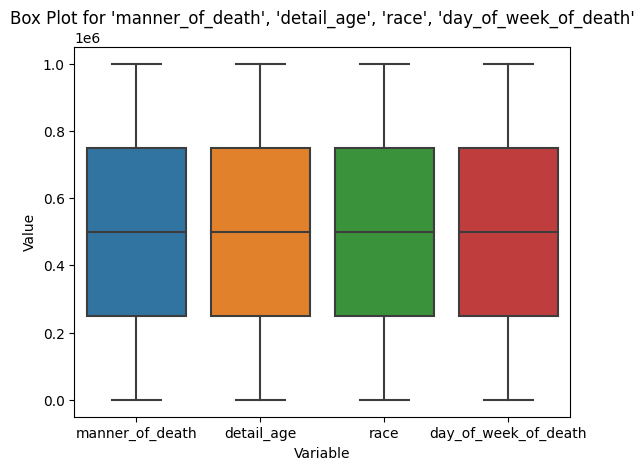

In [ ]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['manner_of_death', 'detail_age', 'race', 'day_of_week_of_death']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for 'manner_of_death', 'detail_age', 'race', 'day_of_week_of_death'")
plt.show()

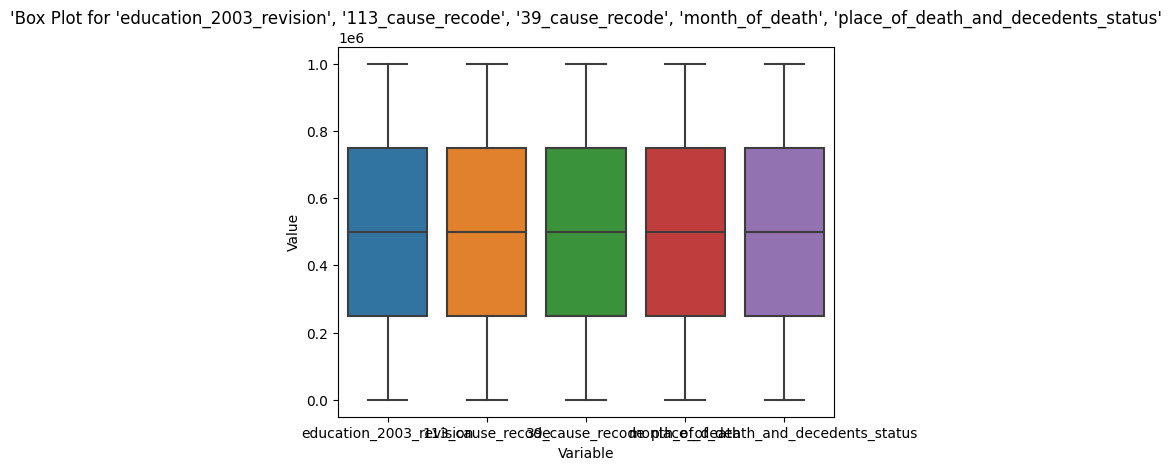

In [ ]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['education_2003_revision', '113_cause_recode', '39_cause_recode', 'month_of_death', 'place_of_death_and_decedents_status']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("'Box Plot for 'education_2003_revision', '113_cause_recode', '39_cause_recode', 'month_of_death', 'place_of_death_and_decedents_status'")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Calculate the minimum and maximum values
min_val = np.min(sampled_df, axis=0)
max_val = np.max(sampled_df, axis=0)

# Perform Min-Max normalization
normalized_data = (sampled_df - min_val) / (max_val - min_val)

print(normalized_data)

       education_2003_revision  month_of_death       sex  \
0                     0.460593        0.460593  0.460593   
1                     0.186274        0.186274  0.186274   
2                     0.601084        0.601084  0.601084   
3                     0.231730        0.231730  0.231730   
4                     0.209007        0.209007  0.209007   
...                        ...             ...       ...   
99995                 0.044013        0.044013  0.044013   
99996                 0.099683        0.099683  0.099683   
99997                 0.799525        0.799525  0.799525   
99998                 0.130063        0.130063  0.130063   
99999                 0.868613        0.868613  0.868613   

       place_of_death_and_decedents_status  marital_status  \
0                                 0.460593        0.460593   
1                                 0.186274        0.186274   
2                                 0.601084        0.601084   
3                              

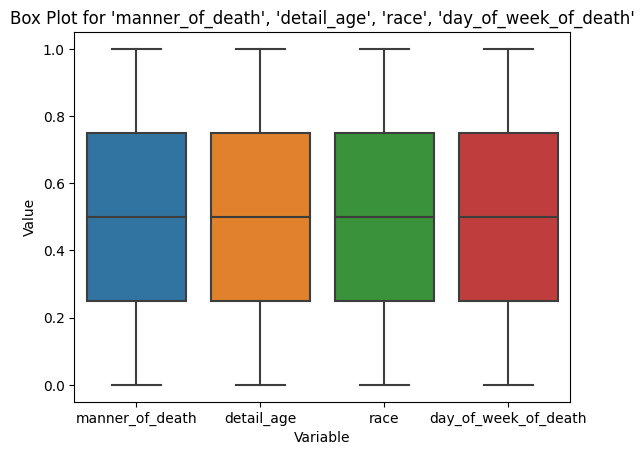

In [ ]:
# Normalized Sample
sns.boxplot(data=normalized_data[['manner_of_death', 'detail_age', 'race', 'day_of_week_of_death']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for 'manner_of_death', 'detail_age', 'race', 'day_of_week_of_death'")
plt.show()

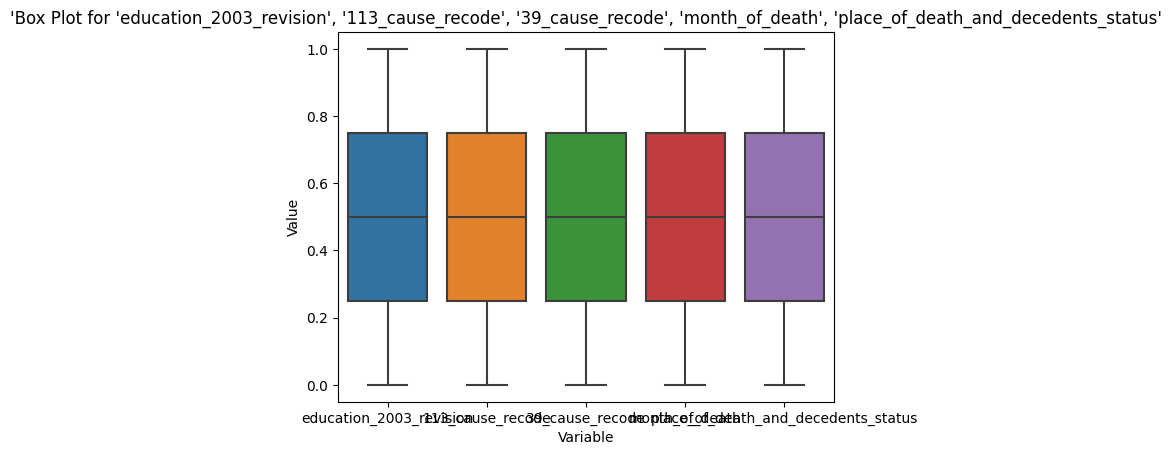

In [ ]:
# Normalized Sample
sns.boxplot(data=normalized_data[['education_2003_revision', '113_cause_recode', '39_cause_recode', 'month_of_death', 'place_of_death_and_decedents_status']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("'Box Plot for 'education_2003_revision', '113_cause_recode', '39_cause_recode', 'month_of_death', 'place_of_death_and_decedents_status'")
plt.show()

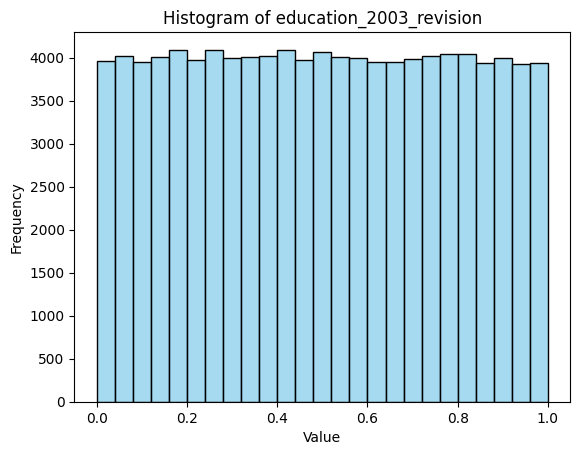

In [ ]:
education_2003_revision  = normalized_data['education_2003_revision']
sns.histplot(education_2003_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of education_2003_revision')
plt.show()

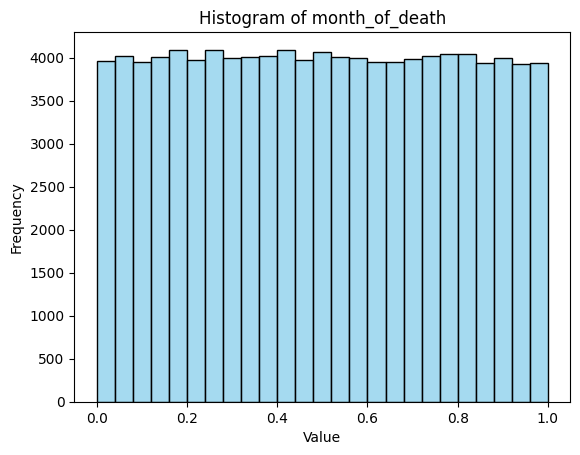

In [ ]:
month_of_death = normalized_data['month_of_death']
sns.histplot(month_of_death, bins=25
             , color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of month_of_death')
plt.show()

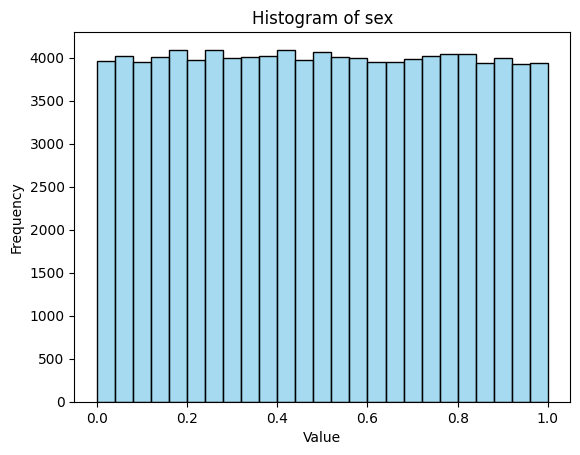

In [ ]:
sex = normalized_data['sex']
sns.histplot(sex, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

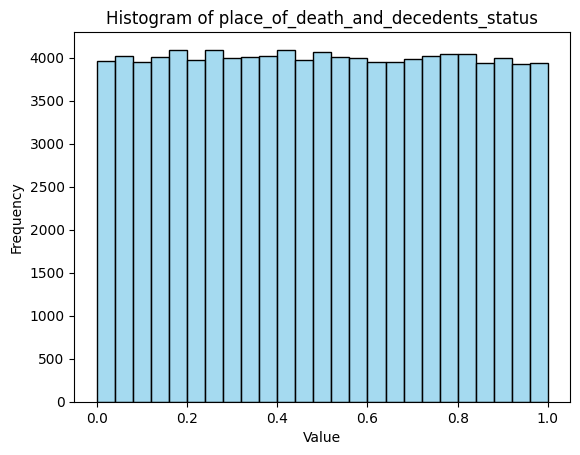

In [ ]:
place_of_death_and_decedents_status = normalized_data['place_of_death_and_decedents_status']
sns.histplot(place_of_death_and_decedents_status, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of place_of_death_and_decedents_status')
plt.show()

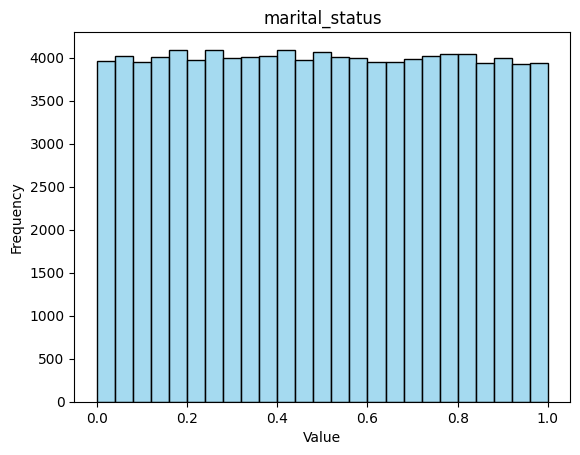

In [ ]:
marital_status = normalized_data['marital_status']
sns.histplot(marital_status, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('marital_status')
plt.show()

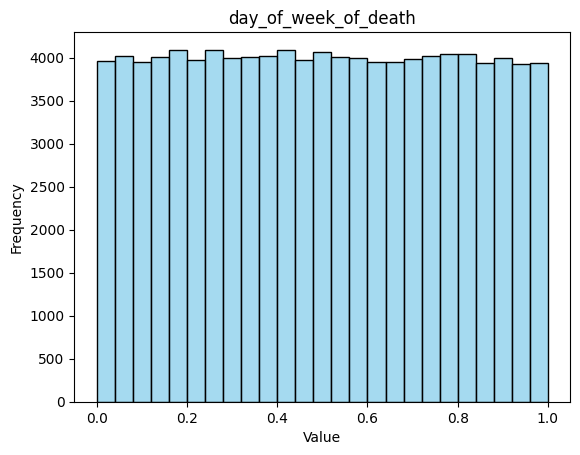

In [ ]:
day_of_week_of_death = normalized_data['day_of_week_of_death']
sns.histplot(day_of_week_of_death, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('day_of_week_of_death')
plt.show()

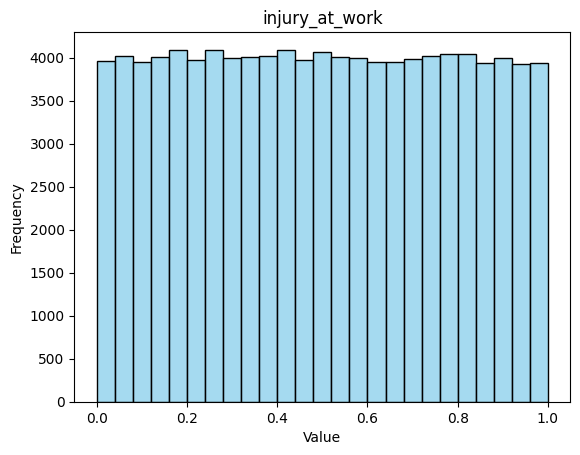

In [ ]:
injury_at_work = normalized_data['injury_at_work']
sns.histplot(injury_at_work, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('injury_at_work')
plt.show()

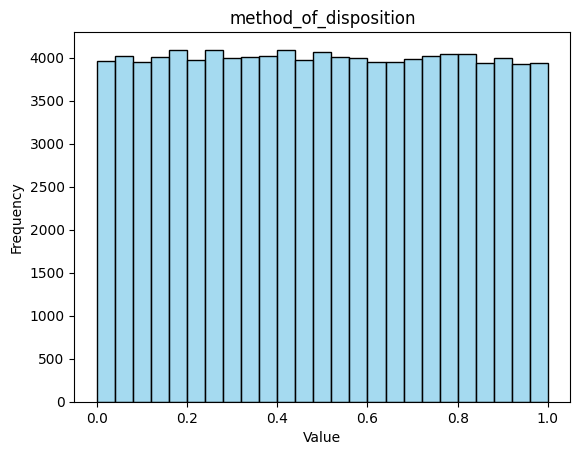

In [ ]:
method_of_disposition = normalized_data['method_of_disposition']
sns.histplot(method_of_disposition, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('method_of_disposition')
plt.show()

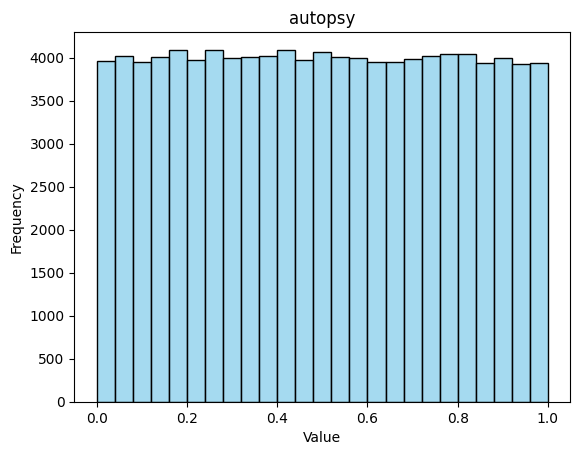

In [ ]:
autopsy = normalized_data['autopsy']
sns.histplot(autopsy, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('autopsy')
plt.show()

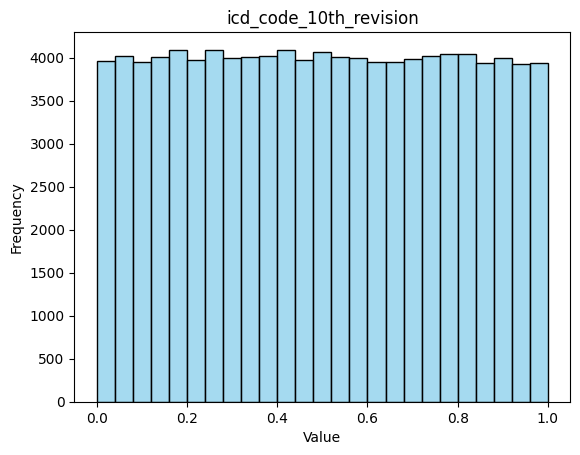

In [ ]:
icd_code_10th_revision = normalized_data['icd_code_10th_revision']
sns.histplot(icd_code_10th_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('icd_code_10th_revision')
plt.show()

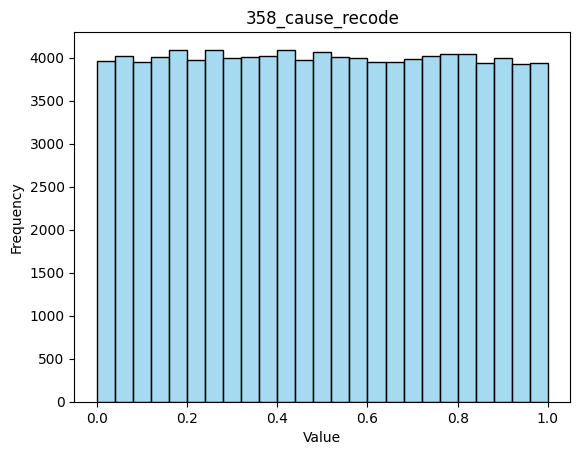

In [ ]:
cause_recode358 = normalized_data['358_cause_recode']
sns.histplot(cause_recode358, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('358_cause_recode')
plt.show()

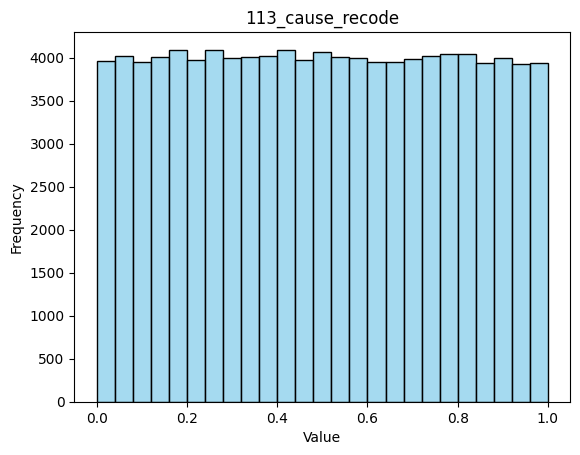

In [ ]:
cause_recode113 = normalized_data['113_cause_recode']
sns.histplot(cause_recode113, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('113_cause_recode')
plt.show()

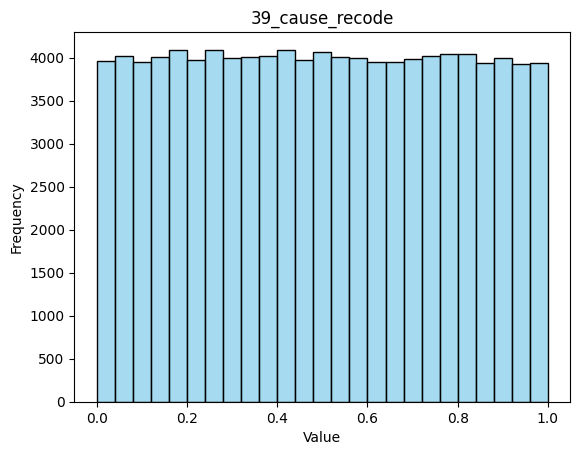

In [ ]:
cause_recode39 = normalized_data['39_cause_recode']
sns.histplot(cause_recode39, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('39_cause_recode')
plt.show()

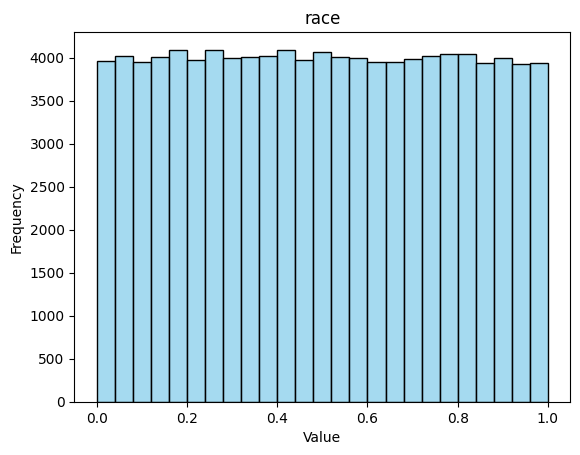

In [ ]:
race = normalized_data['race']
sns.histplot(race, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('race')
plt.show()

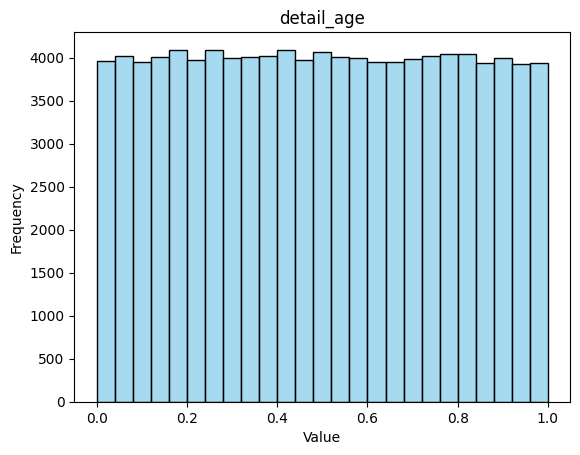

In [ ]:
detail_age = normalized_data['detail_age']
sns.histplot(detail_age, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('detail_age')
plt.show()

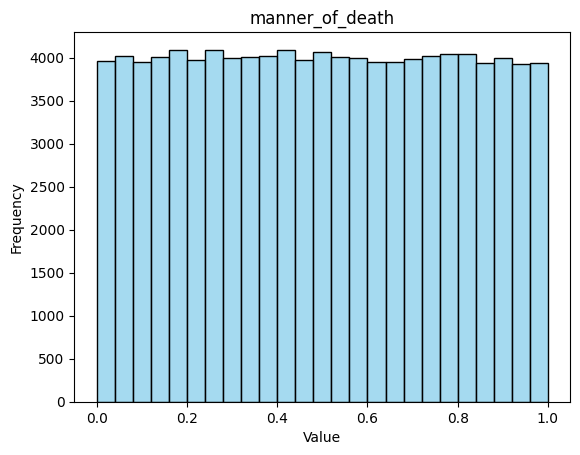

In [ ]:
manner_of_death = normalized_data['manner_of_death']
sns.histplot(manner_of_death, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('manner_of_death')
plt.show()

In [ ]:
# Correlation

numeric_columns = sampled_df.select_dtypes(include='number')
death_correlation_matrix = numeric_columns.corr()
print(death_correlation_matrix)

                                     education_2003_revision  month_of_death  \
education_2003_revision                                  1.0             1.0   
month_of_death                                           1.0             1.0   
sex                                                      1.0             1.0   
place_of_death_and_decedents_status                      1.0             1.0   
marital_status                                           1.0             1.0   
day_of_week_of_death                                     1.0             1.0   
injury_at_work                                           1.0             1.0   
manner_of_death                                          1.0             1.0   
method_of_disposition                                    1.0             1.0   
autopsy                                                  1.0             1.0   
icd_code_10th_revision                                   1.0             1.0   
358_cause_recode                        

In [ ]:
numeric_columns2 = sampled_df.select_dtypes(include='number')
death_correlation_matrix2 = numeric_columns2.corr()
print(death_correlation_matrix2)

                                     education_2003_revision  month_of_death  \
education_2003_revision                                  1.0             1.0   
month_of_death                                           1.0             1.0   
sex                                                      1.0             1.0   
place_of_death_and_decedents_status                      1.0             1.0   
marital_status                                           1.0             1.0   
day_of_week_of_death                                     1.0             1.0   
injury_at_work                                           1.0             1.0   
manner_of_death                                          1.0             1.0   
method_of_disposition                                    1.0             1.0   
autopsy                                                  1.0             1.0   
icd_code_10th_revision                                   1.0             1.0   
358_cause_recode                        

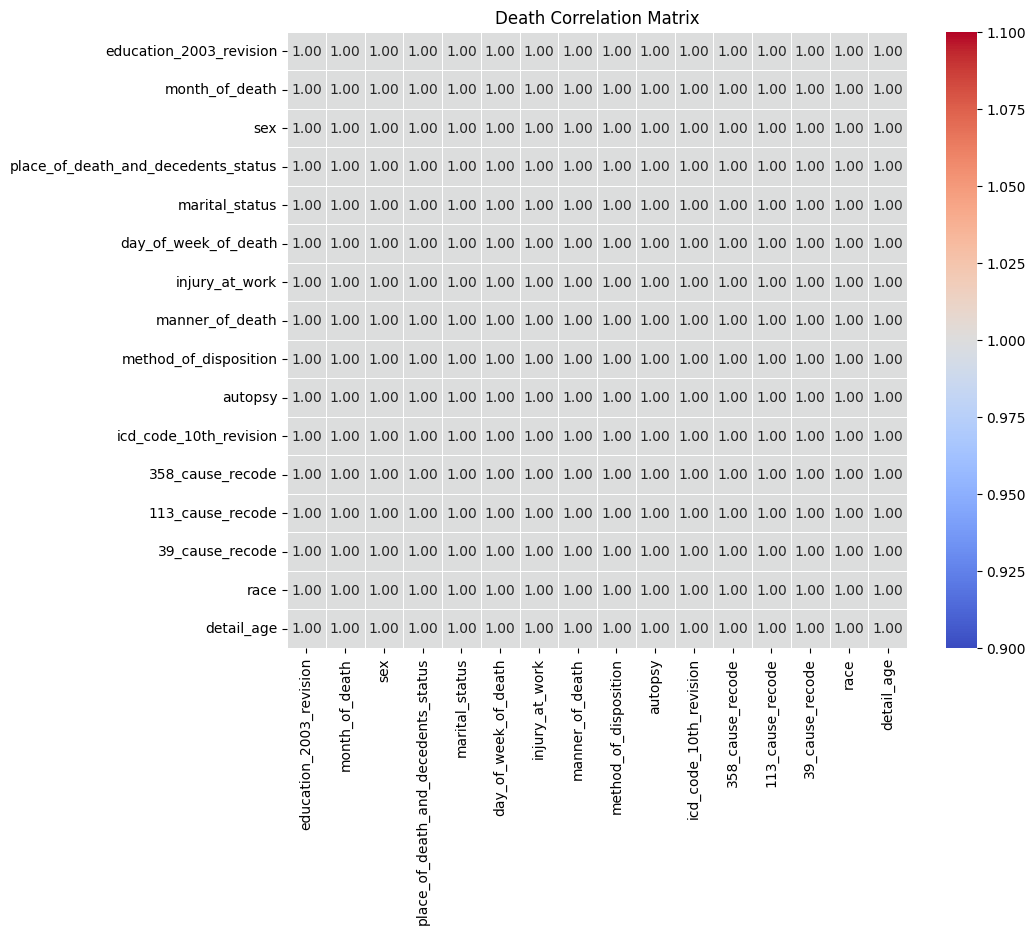

In [ ]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(death_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Death Correlation Matrix')
plt.show()